In [2]:
import pandas as pd
import matplotlib.pyplot as plt

## 1. Data Preparation

In [3]:
# Load an Excel file into a DataFrame
df = pd.read_excel('C:/Users/clint/OneDrive/Desktop/Math6397/Market_Share_Data_Cleaned.xlsx')

print(df.head())

  Company     Month  Year         Type  NOC_Affiliate  NOC_Non-Affiliate  \
0   Oncor   January  2002  Residential        1948790              37211   
1   Oncor  February  2002  Residential        1948790              46099   
2   Oncor     March  2002  Residential        2284493              50137   
3   Oncor     April  2002  Residential        2289730              52660   
4   Oncor       May  2002  Residential        2268645              64636   

   NOC_Total  NOC_% Affiliate  NOC_% Non-Affiliate  MWHS_Affiliate  \
0    1986001         0.981263             0.018737     2250091.827   
1    1994889         0.976891             0.023109     2250091.827   
2    2334630         0.978525             0.021475     2748938.985   
3    2342390         0.977519             0.022481     2246461.740   
4    2333281         0.972298             0.027702     2453433.740   

   MWHS_Non-Affiliate   MWHS_Total  MWHS_% Affiliate  MWHS_% Non-Affiliate  \
0             102.009  2250193.836          

#### Columns in the Dataset:

- **Company**: The name of the company, which is "Oncor" for the displayed rows.
- **Month**: The month of the data entry (from January to May).
- **Year**: The year of the data entry, which is 2002.
- **Type**: The type of customer, which is "Residential" in all shown rows.
- **NOC_Affiliate**: Number of customers affiliated with Oncor.
- **NOC_Non-Affiliate**: Number of customers not affiliated with Oncor.
- **NOC_Total**: Total number of customers.
- **NOC_% Affiliate**: Percentage of total customers who are affiliates.
- **NOC_% Non-Affiliate**: Percentage of total customers who are non-affiliates.
- **MWHS_Affiliate**: Megawatt hours (MWh) used by affiliates.
- **MWHS_Non-Affiliate**: Megawatt hours (MWh) used by non-affiliates.
- **MWHS_Total**: Total megawatt hours used.
- **MWHS_% Affiliate**: Percentage of total megawatt hours used by affiliates.
- **MWHS_% Non-Affiliate**: Percentage of total megawatt hours used by non-affiliates.
- **Avg_Res_kWH_Usage**: Average residential kilowatt hour usage.
- **Avg_SmCom_kWH_Usage**: Average small commercial kilowatt hour usage (data not available in the shown rows).

### Observations:
- The dataset reflects trends and distributions among Companys residential customers, including energy consumption patterns and the proportion of affiliated versus non-affiliated customers.


## 2. Analyze Affiliation Rates

### Trend Analysis for Total Customers and MWh Usage (Elissa Tableau)

              Year  NOC_Affiliate  NOC_Non-Affiliate     NOC_Total  \
count  5760.000000   5.760000e+03       5.760000e+03  5.760000e+03   
mean   2009.500000   4.687740e+05       4.036215e+05  8.723955e+05   
std       4.610172   9.246324e+05       8.434411e+05  1.616762e+06   
min    2002.000000   0.000000e+00       5.000000e+00  3.400000e+01   
25%    2005.750000   6.716000e+03       5.036750e+03  1.426050e+04   
50%    2009.500000   6.000350e+04       4.968800e+04  1.496695e+05   
75%    2013.250000   3.227230e+05       3.095102e+05  7.906995e+05   
max    2017.000000   5.595444e+06       5.062480e+06  7.275171e+06   

       NOC_% Affiliate  NOC_% Non-Affiliate  MWHS_Affiliate  \
count      5760.000000          5760.000000    5.760000e+03   
mean          0.487500             0.512500    8.963270e+05   
std           0.257907             0.257907    1.655013e+06   
min           0.000000             0.000053   -5.413642e+04   
25%           0.293717             0.312122    1.46200

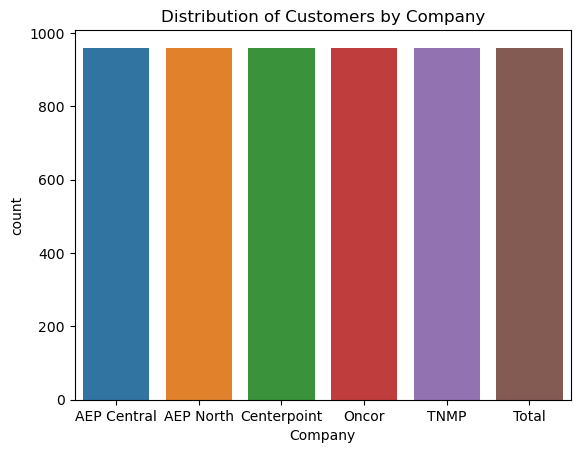

Initial Insights:  Company
AEP Central    960
AEP North      960
Centerpoint    960
Oncor          960
TNMP           960
Total          960
Name: count, dtype: int64


In [14]:
# Descriptive statistics
print(df.describe())

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For example, visualize the distribution of customers by company
sns.countplot(data=df, x='Company')
plt.title('Distribution of Customers by Company')
plt.show()

# Initial insights
# This could be a simple observation of the data
print("Initial Insights: ", df['Company'].value_counts())


## 3. Correlation Analysis

In [15]:
# Assuming Avg_Res_kWH_Usage reflects the average energy consumption
df['Avg_Res_kWH_Usage'].fillna(df['Avg_Res_kWH_Usage'].mean(), inplace=True)  # Handling missing values

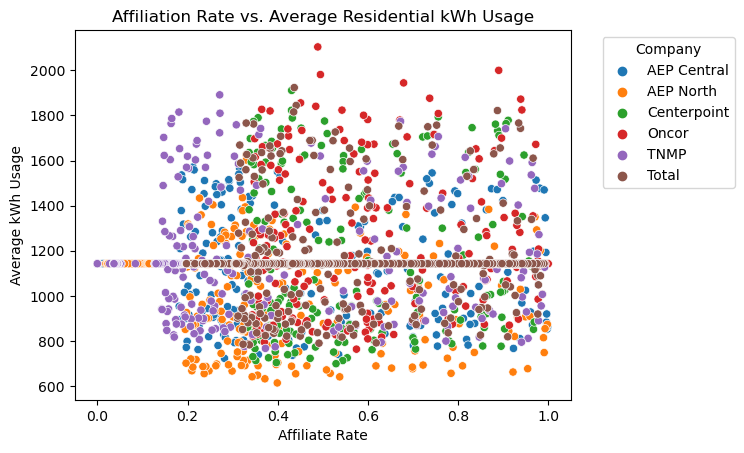

In [16]:
# Visualizing the relationship
import seaborn as sns

df['Affiliate_Rate'] = df['NOC_Affiliate'] / df['NOC_Total']

sns.scatterplot(data=df, x='Affiliate_Rate', y='Avg_Res_kWH_Usage', hue='Company')
plt.title('Affiliation Rate vs. Average Residential kWh Usage')
plt.xlabel('Affiliate Rate')
plt.ylabel('Average kWh Usage')
plt.legend(title='Company', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [17]:
# Calculating correlation
correlation = df[['Affiliate_Rate', 'Avg_Res_kWH_Usage']].corr()
print("Correlation between Affiliate Rate and Average kWh Usage:")
print(correlation)

Correlation between Affiliate Rate and Average kWh Usage:
                   Affiliate_Rate  Avg_Res_kWH_Usage
Affiliate_Rate           1.000000           0.017936
Avg_Res_kWH_Usage        0.017936           1.000000


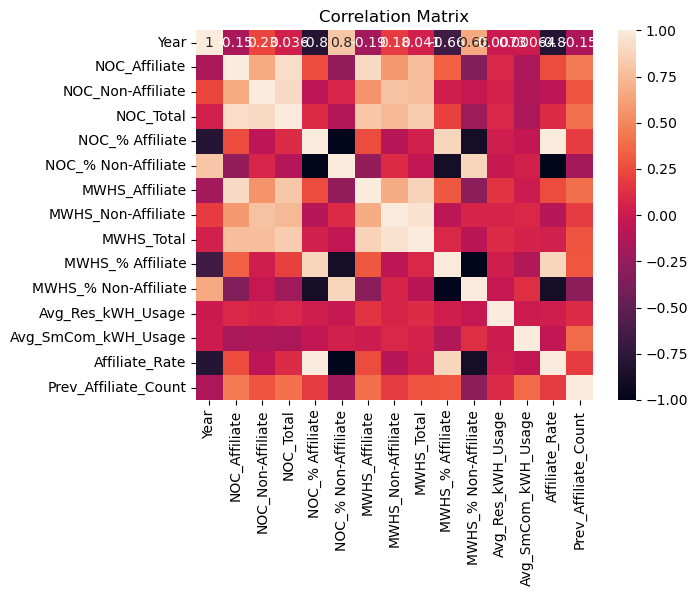

In [36]:
# Filter only numeric columns for correlation matrix
df['Avg_Res_kWH_Usage'] = df['Avg_Res_kWH_Usage'].fillna(0)  # Replace NaNs with 0
df['Avg_SmCom_kWH_Usage'] = df['Avg_SmCom_kWH_Usage'].fillna(0)  # Replace NaNs with 0

correlation_matrix = df.select_dtypes(include=['float64', 'int64']).corr()

# Plot the correlation matrix
sns.heatmap(correlation_matrix, annot=True)
plt.title("Correlation Matrix")
plt.show()


In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [41]:
import pandas as pd
import numpy as np

# Sort the data to ensure it is in chronological order
df.sort_values(by=['Company', 'Year', 'Month'], inplace=True)

# We assume that if there's a month-to-month decrease in the affiliate count,
# that could indicate customers switching away.
# We create a shifted column to compare the affiliate count with the previous month
df['Prev_Affiliate_Count'] = df.groupby('Company')['NOC_Affiliate'].shift(1)

# If the current month's count is lower than the previous, mark as switching behavior
df['Switching_Behavior'] = np.where(df['NOC_Affiliate'] < df['Prev_Affiliate_Count'], 1, 0)

# Fill initial NA values resulting from shift operation with 0
df['Switching_Behavior'].fillna(0, inplace=True)

# Now we have a 'Switching_Behavior' column that marks presumed customer switching


In [42]:
# Assume 'Affiliate_Rate' and 'Avg_Res_kWH_Usage' are predictors for customer switching behavior
X = df[['Affiliate_Rate', 'Avg_Res_kWH_Usage']]
y = df['Switching_Behavior']  # This is a placeholder for target variable

# Scale the predictors
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [43]:
# Create a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Check the model's performance
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)

Model Coefficients: [-0.15290896  0.00398368]
Model Intercept: 0.599736646437696


## 4. Predictive Modeling

In [44]:
# Continue with the model created above for demonstration purposes

# Predict on the test set
predictions = model.predict(X_test)

# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Mean Squared Error: {mse}")
print(f"R-Squared: {r2}")


Mean Squared Error: 0.21528565232264513
R-Squared: 0.10867145959945224


#### The evaluation metrics indicate a Mean Squared Error of approximately 0.215 and an R-squared of approximately 0.109. Based on the R-squared value, it seems that the model currently explains around 16% of the variance in the target variable, which may not be highly predictive. We might consider adding more features, using a different set of features, or trying a different model to improve this score.

#### Let's try creating a logistic regression model and a random forest classifier to see if they perform better than the linear regression model we initially used.

### Logistic Regression Model

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


logistic_model = LogisticRegression()

logistic_model.fit(X_train, y_train)

# Predict on the test set
logistic_predictions = logistic_model.predict(X_test)

# Evaluate the model
logistic_accuracy = accuracy_score(y_test, logistic_predictions)
print(f"Accuracy of Logistic Regression: {logistic_accuracy}")
print(classification_report(y_test, logistic_predictions))


Accuracy of Logistic Regression: 0.6440972222222222
              precision    recall  f1-score   support

           0       0.60      0.39      0.47       470
           1       0.66      0.82      0.73       682

    accuracy                           0.64      1152
   macro avg       0.63      0.60      0.60      1152
weighted avg       0.64      0.64      0.63      1152



### Random Forest Classifier

In [46]:
from sklearn.ensemble import RandomForestClassifier

# Define the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
rf_model.fit(X_train, y_train)

# Predict on the test set
rf_predictions = rf_model.predict(X_test)

# Evaluate the model
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f"Accuracy of Random Forest: {rf_accuracy}")
print(classification_report(y_test, rf_predictions))


Accuracy of Random Forest: 0.6597222222222222
              precision    recall  f1-score   support

           0       0.59      0.55      0.57       470
           1       0.70      0.74      0.72       682

    accuracy                           0.66      1152
   macro avg       0.65      0.64      0.64      1152
weighted avg       0.66      0.66      0.66      1152



In [47]:
#pip install imbalanced-learn


In [48]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create polynomial features
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_scaled)

# Handle class imbalance
smote = SMOTE()
X_sm, y_sm = smote.fit_resample(X_poly, y)

# Create a pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Define hyperparameters for tuning
params = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10]
}

# Grid search with cross-validation
grid_search = GridSearchCV(pipeline, params, cv=5, scoring='accuracy')
grid_search.fit(X_sm, y_sm)

# Best model
best_model = grid_search.best_estimator_

# Evaluate the model with cross-validation
cv_scores = cross_val_score(best_model, X_sm, y_sm, cv=5)

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Cross-validated Accuracy: {cv_scores.mean()}")


Best Parameters: {'classifier__max_depth': 10, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 200}
Cross-validated Accuracy: 0.7355530891601924
